In [ ]:
#Name: Misba Inamdar
#Domain: Data Science

In [21]:
#Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import LocalOutlierFactor

In [22]:
#Reading the dataset
wine_quality = pd.read_excel('C:/Users/91992/Downloads/Major Project Dataset (Wine Classification).xlsx')

In [23]:
#Extract Features and Variables
X = wine_quality.drop('quality', axis=1)
y = wine_quality['quality']

In [24]:
#Initialize the local Outlier Factor Algorithms
clf = LocalOutlierFactor(n_neighbors=20, contamination='auto')

In [25]:
#Drop the Null Values
X = X.dropna()
y = y.dropna()

In [26]:

X = X.fillna(X.mean())
y = y.drop(y.isna().index[0])

In [27]:
#Fit the algorithm to the data
y_pred = clf.fit_predict(X)
scores_pred = clf.negative_outlier_factor_

In [28]:
#Identify the indices of the outliers
outliers_indices = np.where(y_pred == -1)[0]

In [29]:
#Print the number of outliers
print("Number of outliers detected: {}".format(len(outliers_indices)))

Number of outliers detected: 33


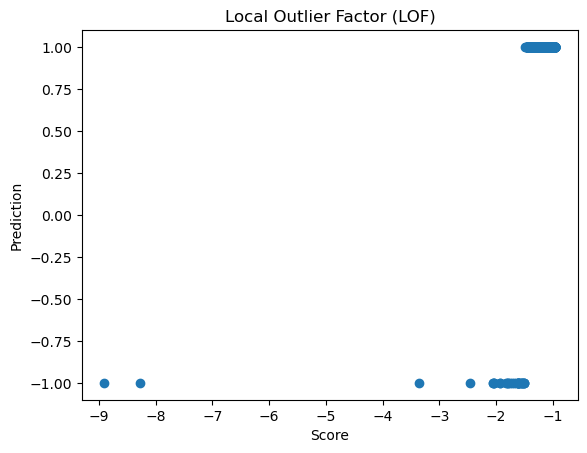

In [30]:
#Ploting the scores
import matplotlib.pyplot as plt
plt.scatter(scores_pred, y_pred)
plt.title("Local Outlier Factor (LOF)")
plt.xlabel("Score")
plt.ylabel("Prediction")
plt.show()

In [31]:
#Initialize the RFE algorithm with Logistic Regression
estimator = LogisticRegression()
selector = RFE(estimator, n_features_to_select=5, step=1)

In [32]:
#Fit the algorithm to the data
selector.fit(X, y)

C:\Users\91992\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\91992\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [33]:
#Print the ranking of each figures
print("Ranking of each feature:")
print(selector.ranking_)

Ranking of each feature:
[4 1 1 5 3 6 7 1 1 1 2]


In [34]:
#Print the number of features selected
print("Number of features selected: {}".format(selector.n_features_))

Number of features selected: 5


In [35]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
#Standarize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
#Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [38]:
#Evaluate the model
y_pred = clf.predict(X_test)
print("Random Forest Classifier:")
print(classification_report(y_test, y_pred))

Random Forest Classifier:
              precision    recall  f1-score   support

         4.0       0.00      0.00      0.00        10
         5.0       0.71      0.80      0.75       133
         6.0       0.67      0.72      0.69       134
         7.0       0.81      0.54      0.65        41
         8.0       0.00      0.00      0.00         2

    accuracy                           0.70       320
   macro avg       0.44      0.41      0.42       320
weighted avg       0.68      0.70      0.68       320



C:\Users\91992\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91992\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91992\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
#Train a SVM
clf = SVC(kernel='linear', random_state=42)
clf.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [40]:
#Evaluate the model
y_pred = clf.predict(X_test)
print("SVM:")
print(classification_report(y_test, y_pred))

SVM:
              precision    recall  f1-score   support

         4.0       0.00      0.00      0.00        10
         5.0       0.61      0.79      0.69       133
         6.0       0.52      0.57      0.55       134
         7.0       0.00      0.00      0.00        41
         8.0       0.00      0.00      0.00         2

    accuracy                           0.57       320
   macro avg       0.23      0.27      0.25       320
weighted avg       0.47      0.57      0.51       320



C:\Users\91992\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91992\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91992\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
